In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import pickle

In [21]:
import os

def exp_name(exp):
    if exp[0] == exp[1]:
        return "{}, {} days".format(exp[0],exp[2])
    else:
        return "{}-of-{}, {} days".format(exp[0],exp[1],exp[2])

entropic_experiments_map = {'withoutMovie_entropic-8-8-3.pkl': [8, 8, 3],
                            'withoutMovie_entropic-10-10-3.pkl': [10,10,3],
                           }

def load_files(exp_map):
    experiments = {}
    for filename in exp_map.keys():
    #     df = parse_results(filename, with_header=True)
        try:
            f = open('experiments/'+filename, "rb")
            results = pickle.load(f)
            f.close()
            print('Number of entries for {}: {}'.format(filename, len(results)))
            experiments[filename] = results
        except:
            print('parsing failed for {}'.format(filename))
            continue
    return experiments

experiments = load_files(entropic_experiments_map)

Number of entries for withoutMovie_entropic-8-8-3.pkl: 10
Number of entries for withoutMovie_entropic-10-10-3.pkl: 10


In [22]:
experiments

{'withoutMovie_entropic-8-8-3.pkl': [{'id': 2638388,
   'aux':          avgMovieRating  count  days  movieId  nbCustReviews  nbMovieReviews  \
   custId                                                                         
   2638388        3.339288    202  1211     5775            202          108888   
   2638388        2.807863    202  1326     5814            202          148932   
   2638388        2.478272    202  1395     2467            202            4792   
   2638388        4.085977    202   580     7624            202          304170   
   2638388        4.436367    202  1207     8904            202          241394   
   2638388        3.943803    202   578    13614            202          180640   
   2638388        2.977528    202   391     8016            202           87958   
   2638388        3.702940    202  1507    16139            202          212570   
   
            rating  rnw  
   custId                
   2638388       4    1  
   2638388       3    2  
  

In [26]:
print([(x["id"], x["entropy"], x["score"], x["eccentricity"], x["matchedId"]) for x in experiments['withoutMovie_entropic-8-8-3.pkl']])

[(2638388, entropy    2.482359
Name: 2638388, dtype: float64, 15.419267662333295, 1.2525500806474994, 1792741), (1072694, entropy    5.947581
Name: 1072694, dtype: float64, 15.822523961729448, 0.060597784637073944, 491531), (431915, entropy    6.023526
Name: 431915, dtype: float64, 15.71552470597571, 0.3435153911441427, 1403217), (2105086, entropy    5.822352
Name: 2105086, dtype: float64, 15.729503589830646, 0.08575048223989637, 1792741), (850652, entropy    6.278342
Name: 850652, dtype: float64, 15.697270671296293, 0.21467015099977713, 2143500), (2037788, entropy    4.425918
Name: 2037788, dtype: float64, 15.553489598013572, 0.06454946456116657, 57633), (2419340, entropy    6.043628
Name: 2419340, dtype: float64, 15.812651107895825, 0.22358700407721388, 1403217), (998574, entropy    6.202898
Name: 998574, dtype: float64, 13.803112854892154, 0.07059704676142056, 1114324), (2613344, entropy    5.988581
Name: 2613344, dtype: float64, 15.67437743480608, 0.23324884632819537, 57633), (1021

In [24]:
a_priori_entropy = 18.9 # log2(N_CUSTOMERS)

statistics = {'nb_movies':[], 'days':[], 'entropy gain':[]}
for filename, results in experiments.items():
    print('experiment {}'.format(exp_name(entropic_experiments_map[filename])))
    entropy = sum([(r['entropy']) for r in results])/len(results)
    print(a_priori_entropy - entropy)
    l = entropic_experiments_map[filename]
    statistics['nb_movies'].append('{}-{}'.format(l[0],l[1]))
    statistics['days'].append(l[2])
    statistics['entropy gain'].append(a_priori_entropy - entropy)

experiment 8, 3 days
entropy    13.353375
dtype: float64
experiment 10, 3 days
entropy    18.848168
dtype: float64


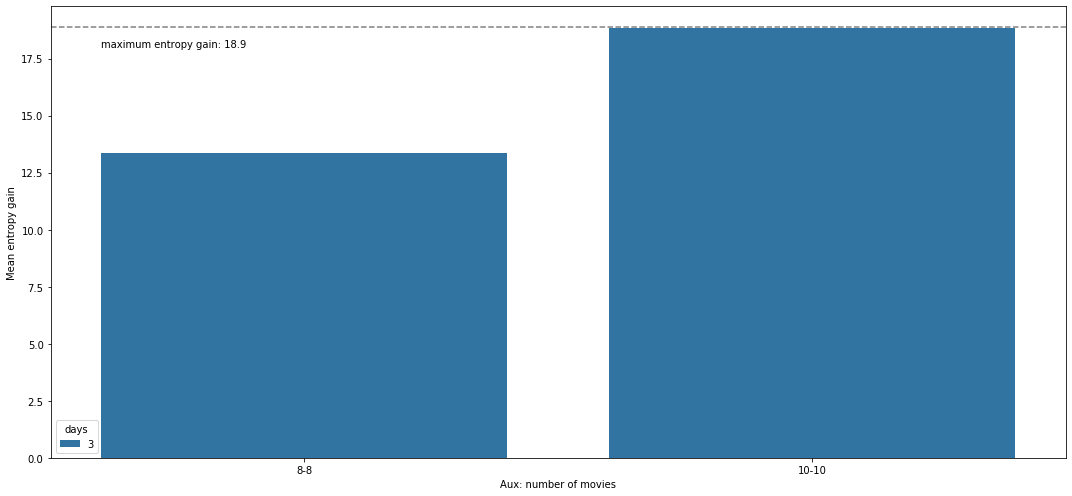

In [25]:
df = pd.DataFrame(statistics)#.set_index(['nb_movies', 'days']).unstack()
plt.figure(figsize=(15,7))
ax = sns.barplot(x='nb_movies', y='entropy gain', hue='days', data=df)
ax.set(xlabel='Aux: number of movies', ylabel='Mean entropy gain')
ax.axhline(18.9, linestyle="--", color="grey")
ax.text(-0.4,18,"maximum entropy gain: 18.9")
plt.tight_layout()
plt.savefig('withoutMovie_entropy.png')
plt.show()